In [ ]:
#LOAD AND PREPARE DATA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Tab-Separated Values (TSV) file into a DataFrame
# The file contains no header, and the columns are separated by tabs ('\t').
df = pd.read_csv('final_average_prices.tsv', sep='\t', 
                 header=None, 
                 names=['Date_Time', 'Total_Price', 'Total_Count', 'Final_Average'])

# Convert the Date_Time column to datetime objects
# The 'errors='coerce'' handles any malformed dates by setting them to NaT (Not a Time)
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')

# Drop any rows where Date_Time parsing failed
df.dropna(subset=['Date_Time'], inplace=True)

# Set the Date_Time as the index for time series plotting
df.set_index('Date_Time', inplace=True)

print("DataFrame Head (First 5 Rows):")
print(df.head())
print("\nDataFrame Info:")
df.info() 

# 1. Time Series Plot of Average Price

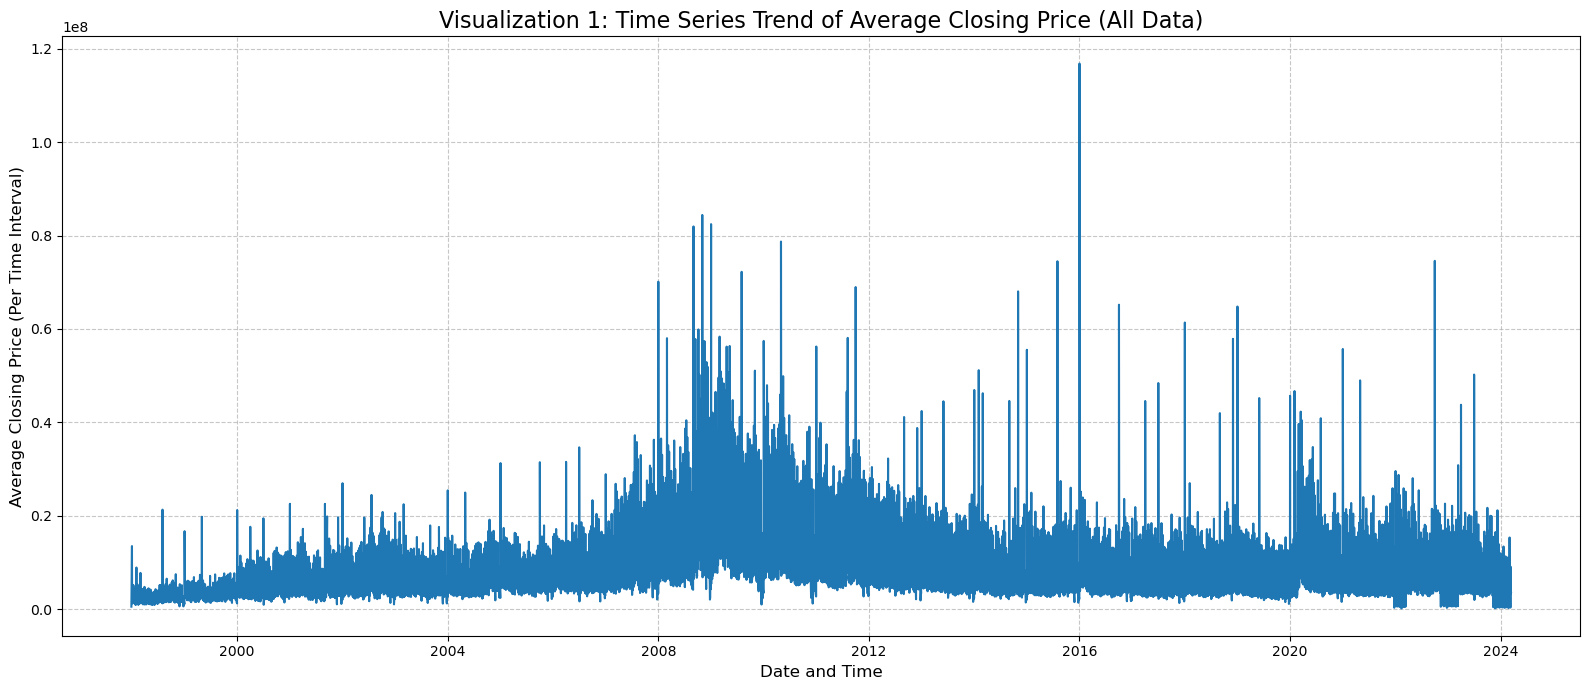

In [51]:
plt.figure(figsize=(16, 7))
# Use a simple line plot for clear trend visualization
sns.lineplot(data=df, x=df.index, y='Final_Average')
plt.title('Visualization 1: Time Series Trend of Average Closing Price (All Data)', fontsize=16)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Average Closing Price (Per Time Interval)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Distribution of Trading Activity (Total Count)

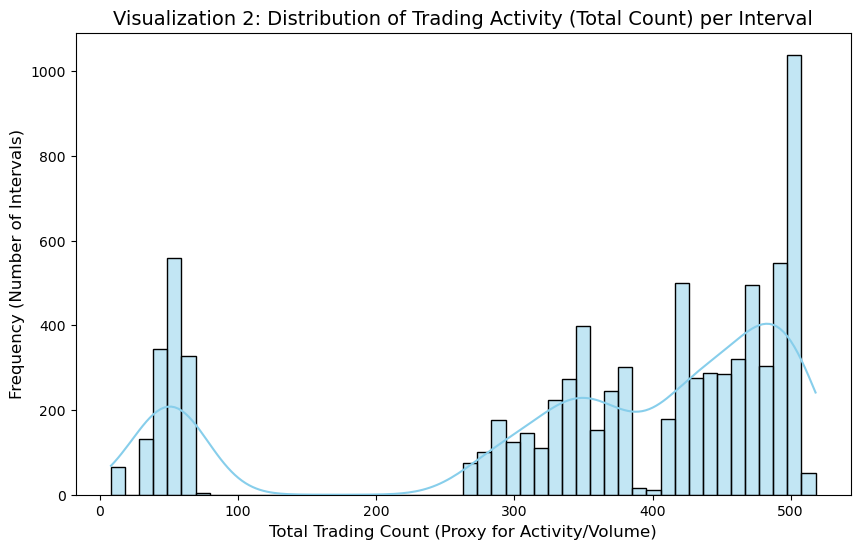

In [54]:
plt.figure(figsize=(10, 6))
# A histogram shows the frequency distribution of the total count per interval
sns.histplot(df['Total_Count'], bins=50, kde=True, color='skyblue')
plt.title('Visualization 2: Distribution of Trading Activity (Total Count) per Interval', fontsize=14)
plt.xlabel('Total Trading Count (Proxy for Activity/Volume)', fontsize=12)
plt.ylabel('Frequency (Number of Intervals)', fontsize=12)
plt.show()

# 3.Daily vs. Intra-Day Average Price

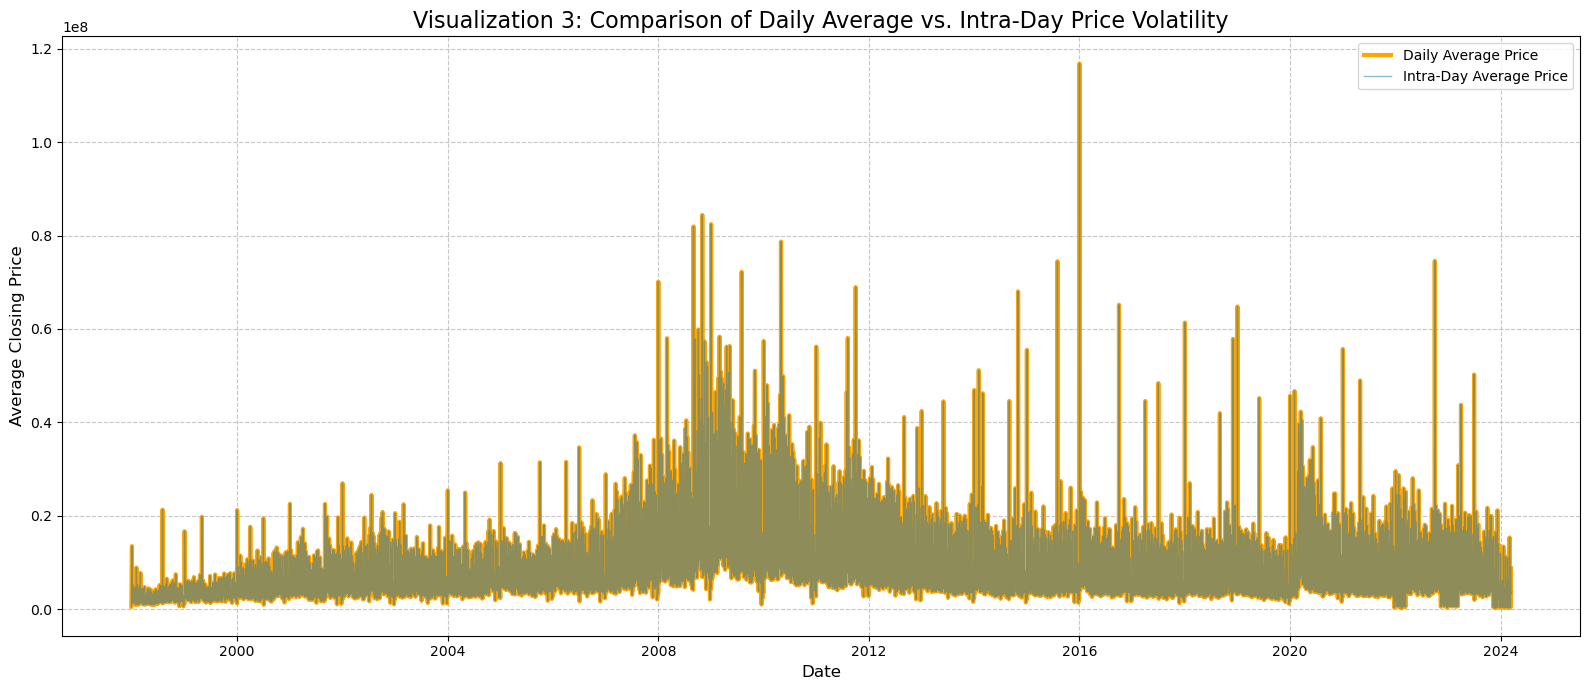

In [57]:
# Resample to get the average price for each trading day
df_daily = df['Final_Average'].resample('D').mean().dropna()

plt.figure(figsize=(16, 7))
# Plot 1: Daily Average (Smoother, macro trend)
sns.lineplot(data=df_daily, label='Daily Average Price', linewidth=3, color='orange')
# Plot 2: Original Intra-Day Averages (Shows volatility/noise)
sns.lineplot(data=df, x=df.index, y='Final_Average', label='Intra-Day Average Price', alpha=0.5, linewidth=1)

plt.title('Visualization 3: Comparison of Daily Average vs. Intra-Day Price Volatility', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Closing Price', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Monthly Average Price Trend (Box Plot)

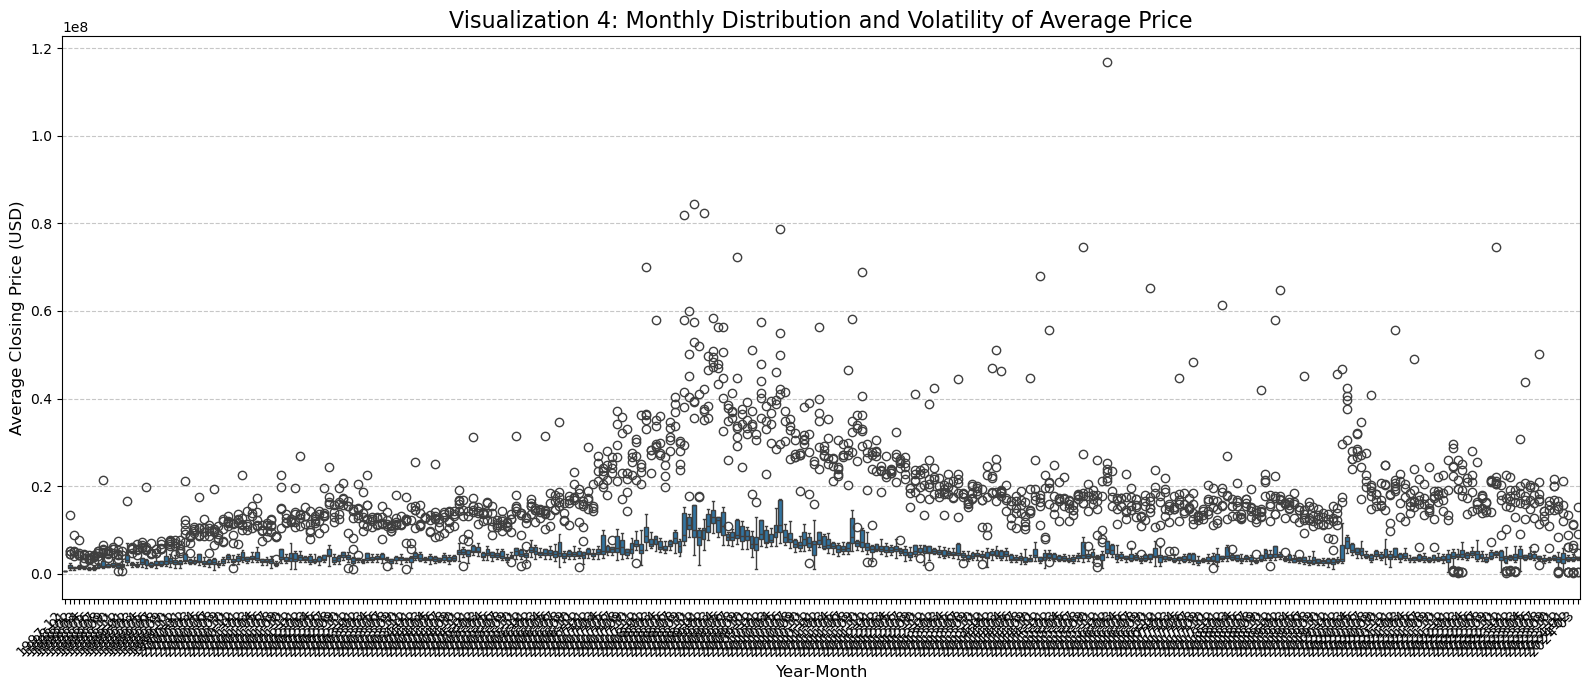

In [62]:
# Create a new column for the Month name
df['Month'] = df.index.strftime('%Y-%m')

plt.figure(figsize=(16, 7))
# Use a Box Plot to show the distribution (Q1, Median, Q3, Min/Max, Outliers)
sns.boxplot(x='Month', y='Final_Average', data=df)

plt.title('Visualization 4: Monthly Distribution and Volatility of Average Price', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Closing Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate month labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Scatter Plot of Price vs. Trading Count (Correlation)

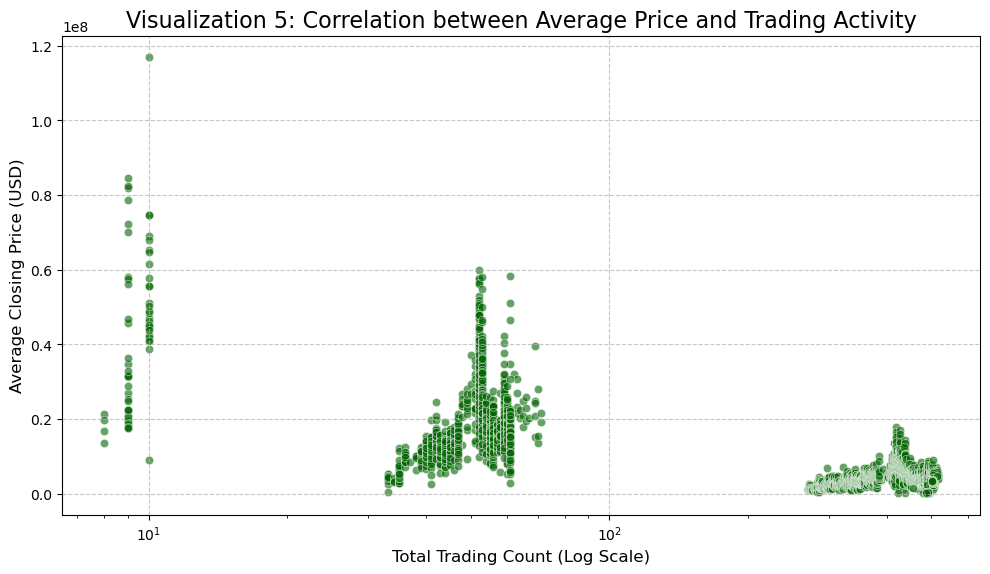

In [68]:
plt.figure(figsize=(10, 6))
# Logarithmic scale on the Total_Count axis is often necessary to handle extreme volume variability
sns.scatterplot(x='Total_Count', y='Final_Average', data=df, alpha=0.6, color='darkgreen')

plt.xscale('log') # Use log scale for count due to wide range of values

plt.title('Visualization 5: Correlation between Average Price and Trading Activity', fontsize=16)
plt.xlabel('Total Trading Count (Log Scale)', fontsize=12)
plt.ylabel('Average Closing Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Average Price Distribution (KDE Plot)

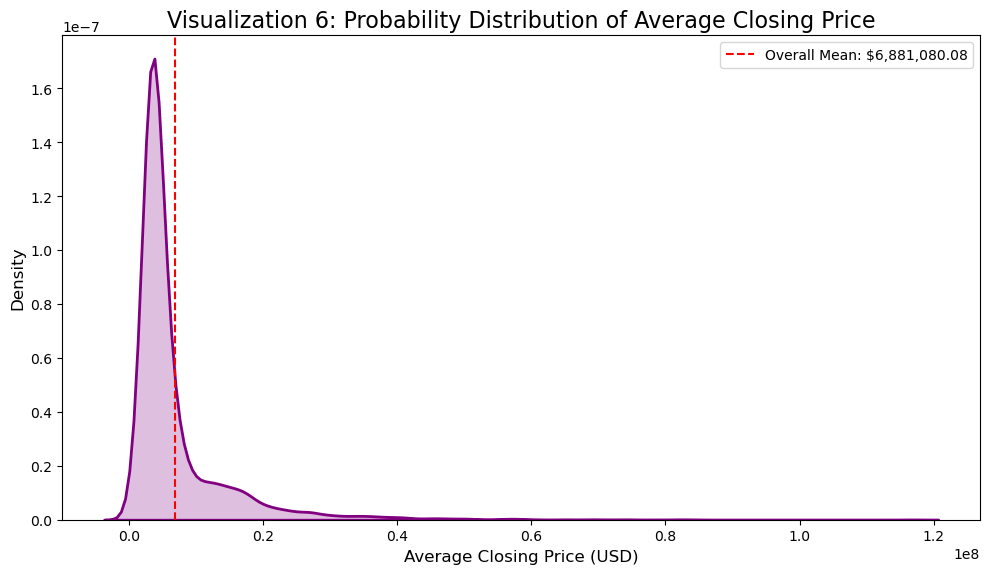

In [71]:
plt.figure(figsize=(10, 6))
# KDE plot shows the probability density function (a smooth curve)
sns.kdeplot(df['Final_Average'], fill=True, color='purple', linewidth=2)

# Mark the mean (average of the averages)
mean_price = df['Final_Average'].mean()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Overall Mean: ${mean_price:,.2f}')

plt.title('Visualization 6: Probability Distribution of Average Closing Price', fontsize=16)
plt.xlabel('Average Closing Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# 7. Weekly Trading Activity Breakdown (Bar Chart)

/var/folders/hx/5jd89km945ngs39y1wg8jzg00000gn/T/ipykernel_55568/229932097.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_weekly_activity.index, y=df_weekly_activity.values, palette='viridis')


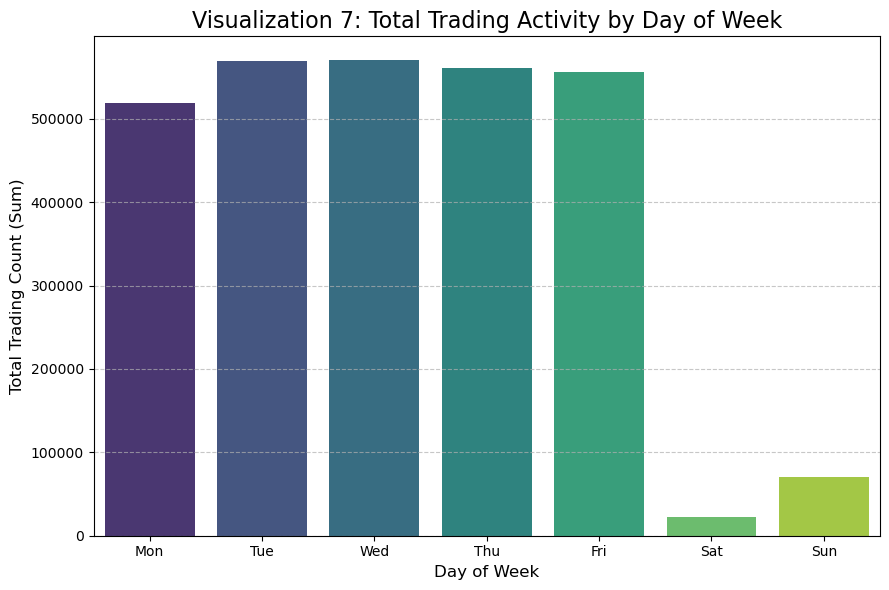

In [76]:
# Create a new column for the Day of the Week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df.index.dayofweek

# Aggregate the Total Count (activity) by Day of the Week
df_weekly_activity = df.groupby('DayOfWeek')['Total_Count'].sum()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(9, 6))
sns.barplot(x=df_weekly_activity.index, y=df_weekly_activity.values, palette='viridis')

plt.title('Visualization 7: Total Trading Activity by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Trading Count (Sum)', fontsize=12)
plt.xticks(ticks=range(7), labels=day_names)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 8. Daily Average Price Change (Difference Plot)

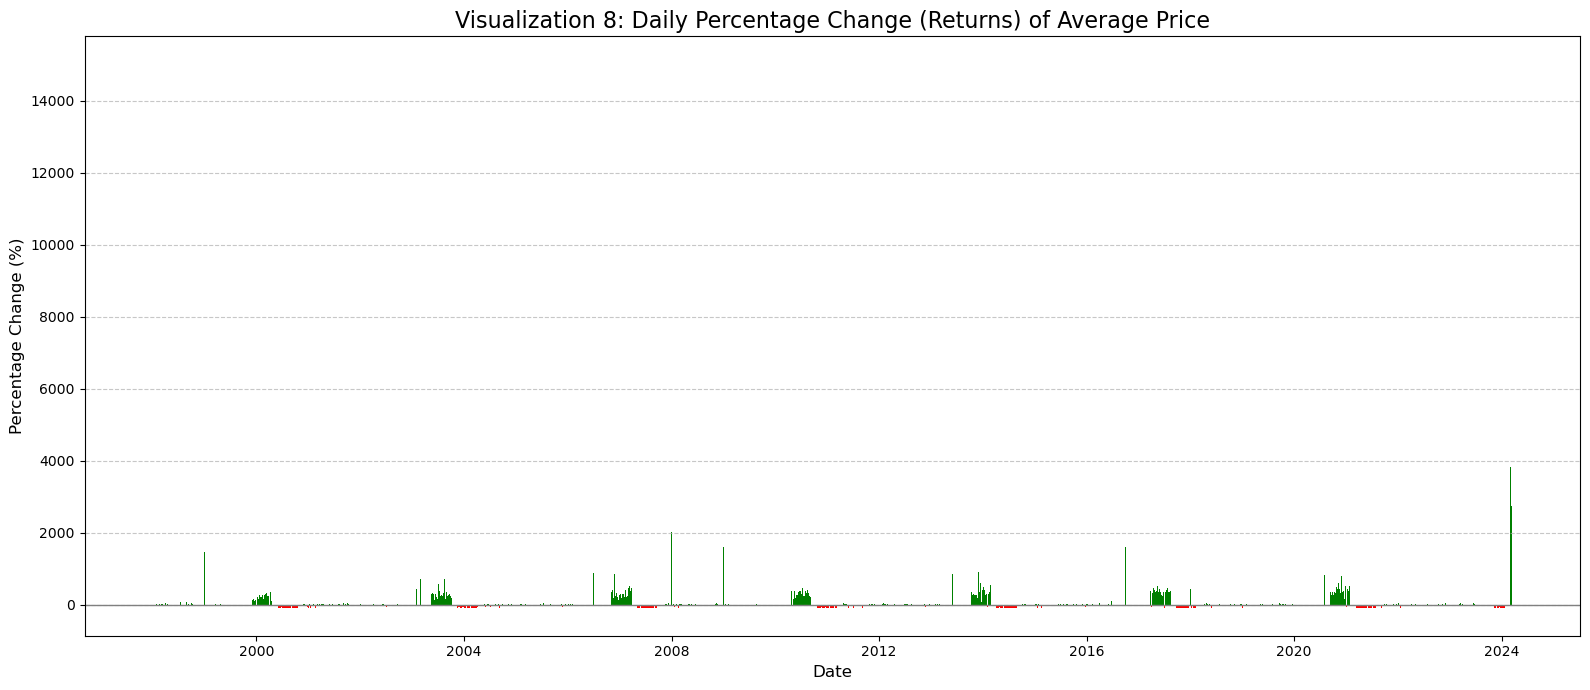

In [79]:
# Calculate the daily average price
df_daily = df['Final_Average'].resample('D').mean().dropna()

# Calculate the percentage change (daily returns)
df_daily_returns = df_daily.pct_change().dropna() * 100

plt.figure(figsize=(16, 7))
# Use a bar plot to highlight positive (green) and negative (red) changes
colors = ['green' if x > 0 else 'red' for x in df_daily_returns]
plt.bar(df_daily_returns.index, df_daily_returns.values, color=colors, width=0.8)

plt.axhline(0, color='gray', linestyle='-', linewidth=1) # Zero line

plt.title('Visualization 8: Daily Percentage Change (Returns) of Average Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 9. Average Price Profile by Hour of Day

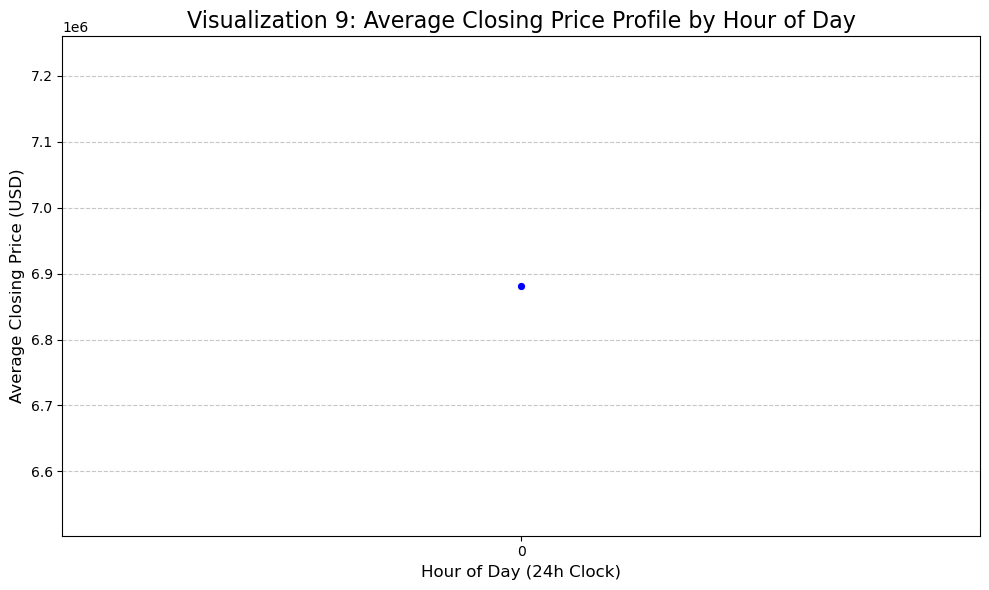

In [82]:
# Create a column for the hour of the day
df['Hour'] = df.index.hour

# Calculate the mean average price for each hour
df_hourly_profile = df.groupby('Hour')['Final_Average'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_hourly_profile.index, y=df_hourly_profile.values, marker='o', color='blue')

plt.title('Visualization 9: Average Closing Price Profile by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (24h Clock)', fontsize=12)
plt.ylabel('Average Closing Price (USD)', fontsize=12)
plt.xticks(df_hourly_profile.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 10. Cumulative Trading Activity Over Time

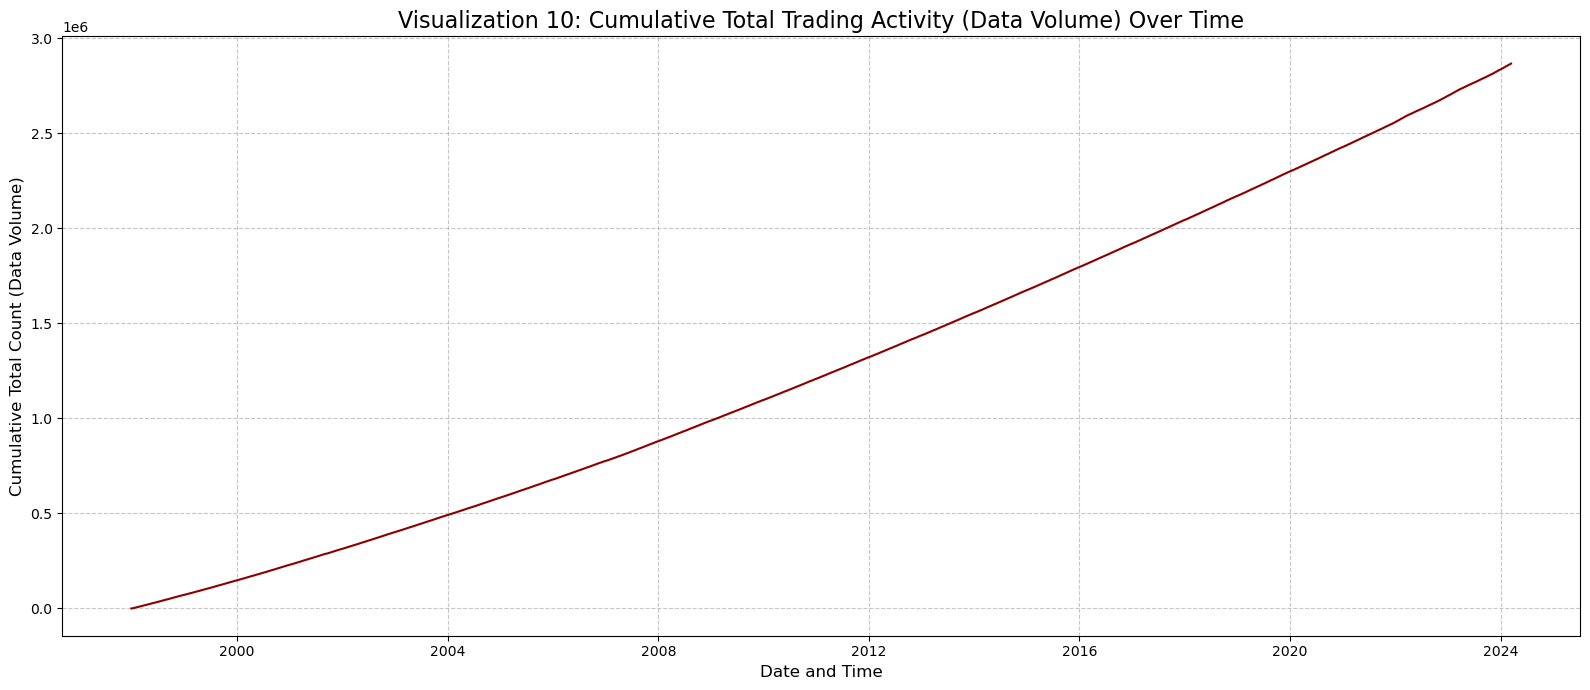

In [85]:
# Calculate the cumulative sum of the total count (trading activity)
df['Cumulative_Count'] = df['Total_Count'].cumsum()

plt.figure(figsize=(16, 7))
sns.lineplot(x=df.index, y='Cumulative_Count', data=df, color='darkred')

plt.title('Visualization 10: Cumulative Total Trading Activity (Data Volume) Over Time', fontsize=16)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Cumulative Total Count (Data Volume)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 11. 30-Day Rolling Volatility

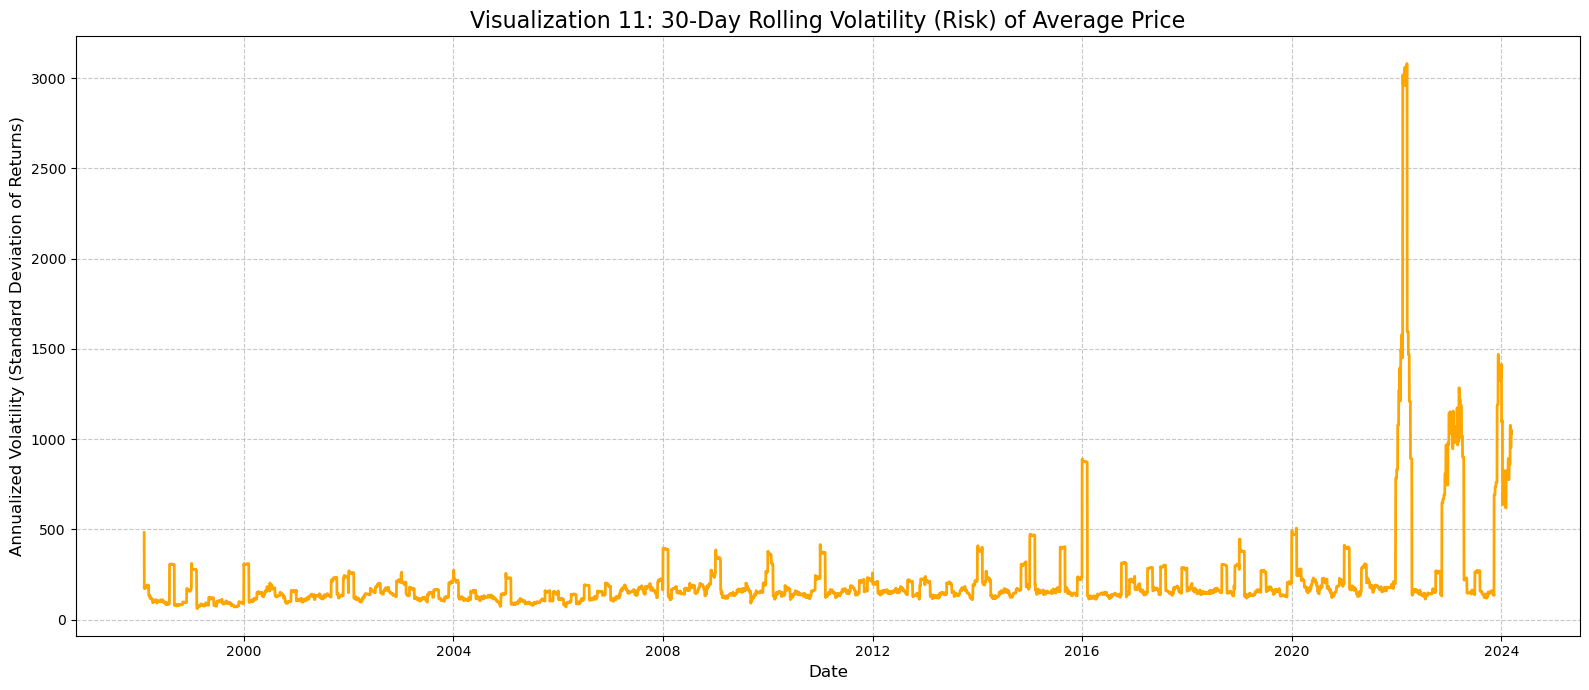

In [88]:
# Assuming df_daily (from Viz 3) and df_daily_returns (from Viz 8) have been created.
# Calculate the daily average price
df_daily = df['Final_Average'].resample('D').mean().dropna()
# Calculate the daily percentage change (returns)
df_daily_returns = df_daily.pct_change().dropna() * 100

# Calculate the rolling 30-day standard deviation (volatility)
df_volatility = df_daily_returns.rolling(window=30).std().dropna()

plt.figure(figsize=(16, 7))
sns.lineplot(x=df_volatility.index, y=df_volatility.values, color='orange', linewidth=2)

plt.title('Visualization 11: 30-Day Rolling Volatility (Risk) of Average Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Annualized Volatility (Standard Deviation of Returns)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 12. Average Price Heatmap by Day and Hour

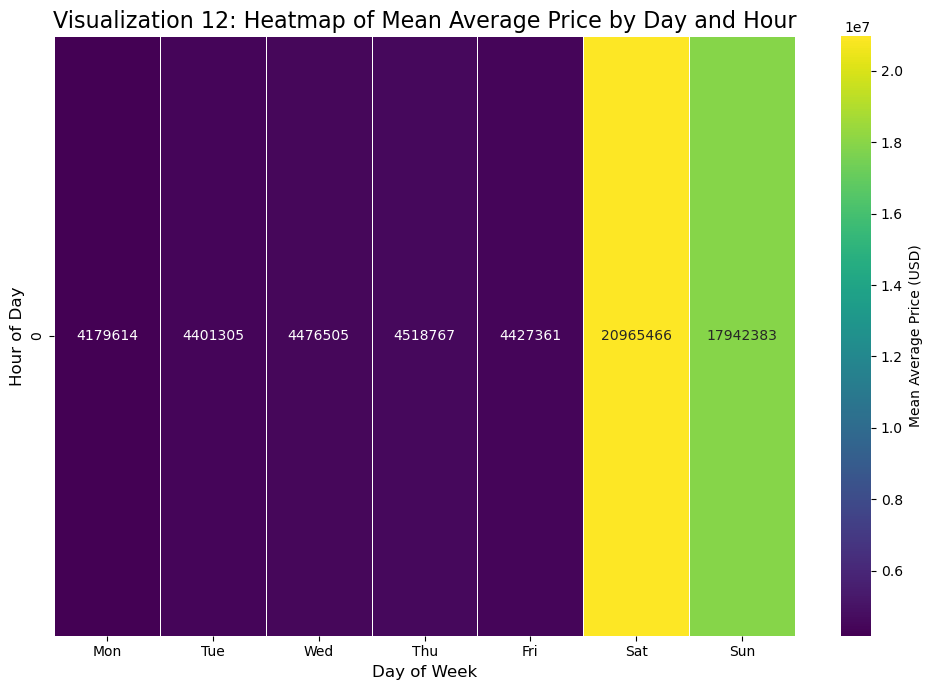

In [91]:
# Aggregate the data to find the mean average price for each combination of DayOfWeek and Hour
df_pivot = df.pivot_table(index='Hour', columns='DayOfWeek', values='Final_Average', aggfunc='mean')
df_pivot.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 7))
sns.heatmap(df_pivot, cmap='viridis', annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Mean Average Price (USD)'})

plt.title('Visualization 12: Heatmap of Mean Average Price by Day and Hour', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.tight_layout()
plt.show()

# 13. Top 10 Busiest Trading Days

/var/folders/hx/5jd89km945ngs39y1wg8jzg00000gn/T/ipykernel_55568/2605859353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_daily_activity.index.astype(str), y=df_daily_activity.values, palette='magma')


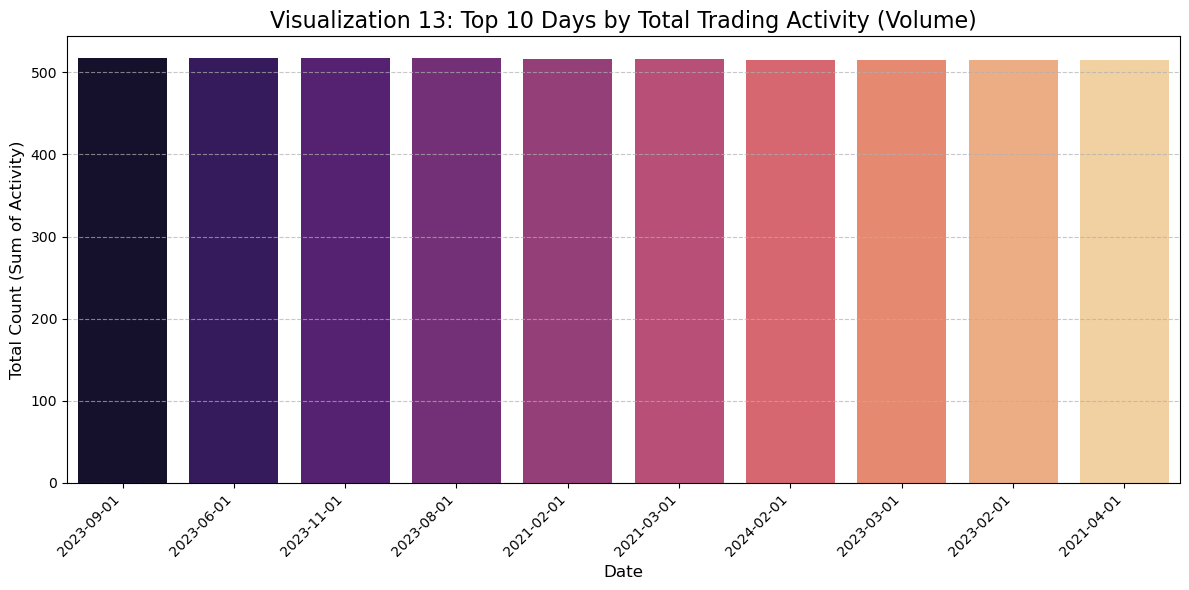

In [94]:
# Calculate total trading count summed per day
df_daily_activity = df.groupby(df.index.date)['Total_Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_daily_activity.index.astype(str), y=df_daily_activity.values, palette='magma')

plt.title('Visualization 13: Top 10 Days by Total Trading Activity (Volume)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Count (Sum of Activity)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 14. Quarterly Average Price Trend

/var/folders/hx/5jd89km945ngs39y1wg8jzg00000gn/T/ipykernel_55568/3467420884.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df['Final_Average'].resample('Q').mean().dropna()
/var/folders/hx/5jd89km945ngs39y1wg8jzg00000gn/T/ipykernel_55568/3467420884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_quarterly_returns.index.strftime('%Y-Q%q'), y=df_quarterly_returns.values,
/var/folders/hx/5jd89km945ngs39y1wg8jzg00000gn/T/ipykernel_55568/3467420884.py:7: UserWarning: The palette list has more values (105) than needed (27), which may not be intended.
  sns.barplot(x=df_quarterly_returns.index.strftime('%Y-Q%q'), y=df_quarterly_returns.values,


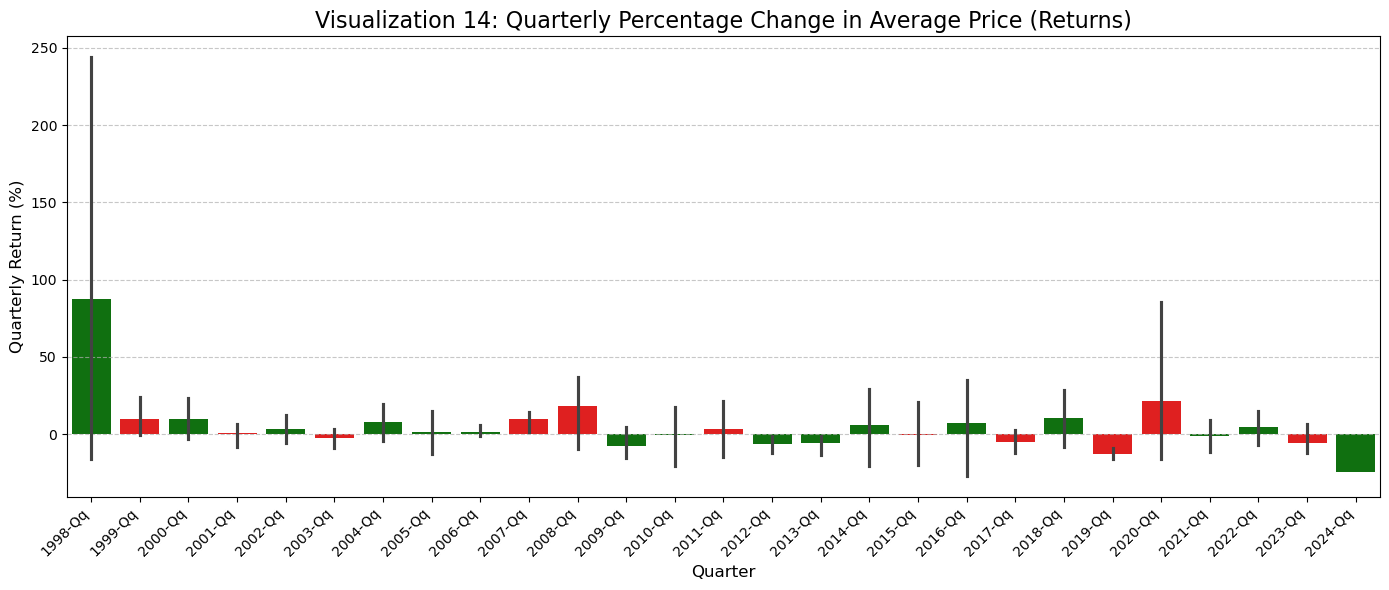

In [97]:
# Resample to Quarterly mean and calculate the percentage change
df_quarterly = df['Final_Average'].resample('Q').mean().dropna()
df_quarterly_returns = df_quarterly.pct_change().dropna() * 100

plt.figure(figsize=(14, 6))
# Bar chart of quarterly returns
sns.barplot(x=df_quarterly_returns.index.strftime('%Y-Q%q'), y=df_quarterly_returns.values, 
            palette=['green' if x > 0 else 'red' for x in df_quarterly_returns])

plt.title('Visualization 14: Quarterly Percentage Change in Average Price (Returns)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Quarterly Return (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()